In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.linalg import pinv
from scipy.stats import multivariate_normal
from scipy.stats import gamma
from scipy.stats import invgauss
from scipy.stats import reciprocal
np.set_printoptions(precision=3)
np.random.seed(0)

In [5]:
df = pd.read_csv('reg-lr-data.csv', sep=',')
df = 

In [6]:
df

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [3]:
X = D.values[:,:6]

In [4]:
print(X)

[[  83.     234.289  235.6    159.     107.608 1947.   ]
 [  88.5    259.426  232.5    145.6    108.632 1948.   ]
 [  88.2    258.054  368.2    161.6    109.773 1949.   ]
 [  89.5    284.599  335.1    165.     110.929 1950.   ]
 [  96.2    328.975  209.9    309.9    112.075 1951.   ]
 [  98.1    346.999  193.2    359.4    113.27  1952.   ]
 [  99.     365.385  187.     354.7    115.094 1953.   ]
 [ 100.     363.112  357.8    335.     116.219 1954.   ]
 [ 101.2    397.469  290.4    304.8    117.388 1955.   ]
 [ 104.6    419.18   282.2    285.7    118.734 1956.   ]
 [ 108.4    442.769  293.6    279.8    120.445 1957.   ]
 [ 110.8    444.546  468.1    263.7    121.95  1958.   ]
 [ 112.6    482.704  381.3    255.2    123.366 1959.   ]
 [ 114.2    502.601  393.1    251.4    125.368 1960.   ]
 [ 115.7    518.173  480.6    257.2    127.852 1961.   ]
 [ 116.9    554.894  400.7    282.7    130.081 1962.   ]]


In [5]:
X_scaler = StandardScaler()

In [6]:
X = X_scaler.fit_transform(X)

In [7]:
print(X)

[[-1.788 -1.594 -0.925 -1.509 -1.457 -1.627]
 [-1.261 -1.333 -0.96  -1.708 -1.305 -1.41 ]
 [-1.29  -1.347  0.54  -1.47  -1.136 -1.193]
 [-1.166 -1.071  0.174 -1.42  -0.964 -0.976]
 [-0.525 -0.61  -1.209  0.731 -0.794 -0.759]
 [-0.343 -0.423 -1.394  1.465 -0.617 -0.542]
 [-0.257 -0.232 -1.463  1.395 -0.346 -0.325]
 [-0.161 -0.255  0.425  1.103 -0.179 -0.108]
 [-0.046  0.102 -0.32   0.655 -0.005  0.108]
 [ 0.279  0.327 -0.41   0.371  0.195  0.325]
 [ 0.643  0.572 -0.284  0.284  0.449  0.542]
 [ 0.873  0.591  1.644  0.045  0.672  0.759]
 [ 1.045  0.987  0.685 -0.081  0.882  0.976]
 [ 1.198  1.194  0.815 -0.138  1.179  1.193]
 [ 1.342  1.356  1.782 -0.051  1.548  1.41 ]
 [ 1.456  1.737  0.899  0.327  1.879  1.627]]


In [8]:
y = D.values[:,6]

In [9]:
print(y)

[60.323 61.122 60.171 61.187 63.221 63.639 64.989 63.761 66.019 67.857
 68.169 66.513 68.655 69.564 69.331 70.551]


In [10]:
y_bar = np.mean(y)

In [11]:
y = y - y_bar

In [12]:
print(y)

[-4.994 -4.195 -5.146 -4.13  -2.096 -1.678 -0.328 -1.556  0.702  2.54
  2.852  1.196  3.338  4.247  4.014  5.234]


In [13]:
n = np.size(X,0)
p = np.size(X,1)

In [14]:
beta_0 = pinv(X.transpose().dot(X) + np.identity(p)).dot(X.transpose().dot(y))

In [15]:
print(beta_0)

[ 0.896  1.086 -0.744 -0.197  0.789  1.062]


In [16]:
r = y - X.dot(beta_0)

In [17]:
print(r)

[ 0.233 -0.139 -0.251 -0.274 -0.286 -0.597 -0.041 -0.345  0.413  1.203
  0.569 -0.333  0.09   0.258 -0.065 -0.436]


In [18]:
sigma_sqr_0 = r.transpose().dot(r) / n

In [19]:
print(sigma_sqr_0)

0.19322031712381152


In [20]:
tau_0 = 1.0 / (beta_0 * beta_0)

In [21]:
print(tau_0)

[ 1.246  0.848  1.808 25.867  1.604  0.886]


In [22]:
lambda_0 = p * np.sqrt(sigma_sqr_0)/sum(abs(beta_0))

In [23]:
lambda_0

0.5524867860453132

In [24]:
def D_tau(tau_sqr):
    return np.diag(tau_sqr)

In [25]:
D_tau_0 = D_tau(tau_0)

In [26]:
D_tau_0

array([[ 1.246,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.848,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  1.808,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , 25.867,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.604,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.886]])

In [27]:
def beta(D_tau, sigma_sqr):
    A = X.transpose().dot(X) + pinv(D_tau)
    A_plus = pinv(A)
    loc = A_plus.dot(X.transpose().dot(y))
    scale = sigma_sqr * A_plus
    return multivariate_normal.rvs(loc, scale)

In [28]:
def sigma_sqr(beta, D_tau):
    shape = (n - 1)/2 + p/2
    scale = (y - X.dot(beta)).transpose().dot(y - X.dot(beta))/2 \
        + beta.transpose().dot(pinv(D_tau)).dot(beta)/2
    return 1 / gamma.rvs(shape, scale)

In [29]:
def tau_sqr_inv(lambda_k, sigma_sqr, beta):
    mean = 1 / lambda_k * np.sqrt(sigma_sqr / beta * beta)
    return lambda_k **2 * invgauss.rvs(mean)

In [30]:
def sample(tau_0, sigma_sqr_0, numSamples):
    tau_sqr_inv_i = tau_0
    sigma_sqr_i = sigma_sqr_0
    samples = np.zeros([numSamples, p])
    for i in range(numSamples):
        beta_i = beta(D_tau(tau_sqr_inv_i), sigma_sqr_i)
        sigma_sqr_i = sigma_sqr(beta_i, D_tau(tau_sqr_inv_i))
        tau_sqr_inv_i = tau_sqr_inv(lambda_0, sigma_sqr_i, beta_i)
        samples[i] = beta_i
    return samples

In [31]:
beta(D_tau_0, sigma_sqr_0)

array([ 1.084,  0.924, -1.092, -0.634,  1.977,  0.394])

In [32]:
sigma_sqr(beta_0, D_tau_0)

0.05863680320640486

In [33]:
tau_sqr_inv(lambda_0, sigma_sqr_0, beta_0)

array([0.212, 0.276, 0.823, 0.36 , 0.327, 0.07 ])

In [34]:
samples = sample(tau_0, sigma_sqr_0, 100)

In [35]:
X_scaler.inverse_transform(samples)

array([[ 109.431,  497.993,  251.097,  242.979,  124.996, 1959.238],
       [ 104.55 ,  430.98 ,  288.465,  273.726,  131.177, 1956.085],
       [ 104.537,  518.262,  314.486,  270.765,  122.73 , 1956.775],
       [ 108.85 ,  472.786,  321.219,  271.764,  119.545, 1957.896],
       [ 105.819,  510.651,  308.745,  272.214,  118.76 , 1959.867],
       [ 113.29 ,  437.397,  317.439,  275.101,  120.701, 1957.094],
       [ 103.527,  491.696,  313.614,  274.898,  125.34 , 1957.007],
       [ 106.613,  473.004,  322.325,  288.85 ,  124.354, 1956.22 ],
       [ 111.081,  451.6  ,  323.78 ,  276.27 ,  123.63 , 1955.848],
       [ 104.436,  508.577,  306.622,  272.234,  123.111, 1958.219],
       [ 103.492,  522.987,  306.392,  265.893,  121.108, 1958.675],
       [ 106.589,  467.765,  312.349,  269.523,  121.792, 1959.303],
       [ 109.723,  417.318,  314.771,  276.399,  122.408, 1958.756],
       [ 118.441,  413.906,  315.41 ,  272.667,  122.214, 1955.809],
       [ 109.063,  434.209,  329.3

In [36]:
D.columns[:6]

Index(['GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces', 'Population',
       'Year'],
      dtype='object')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/dave/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


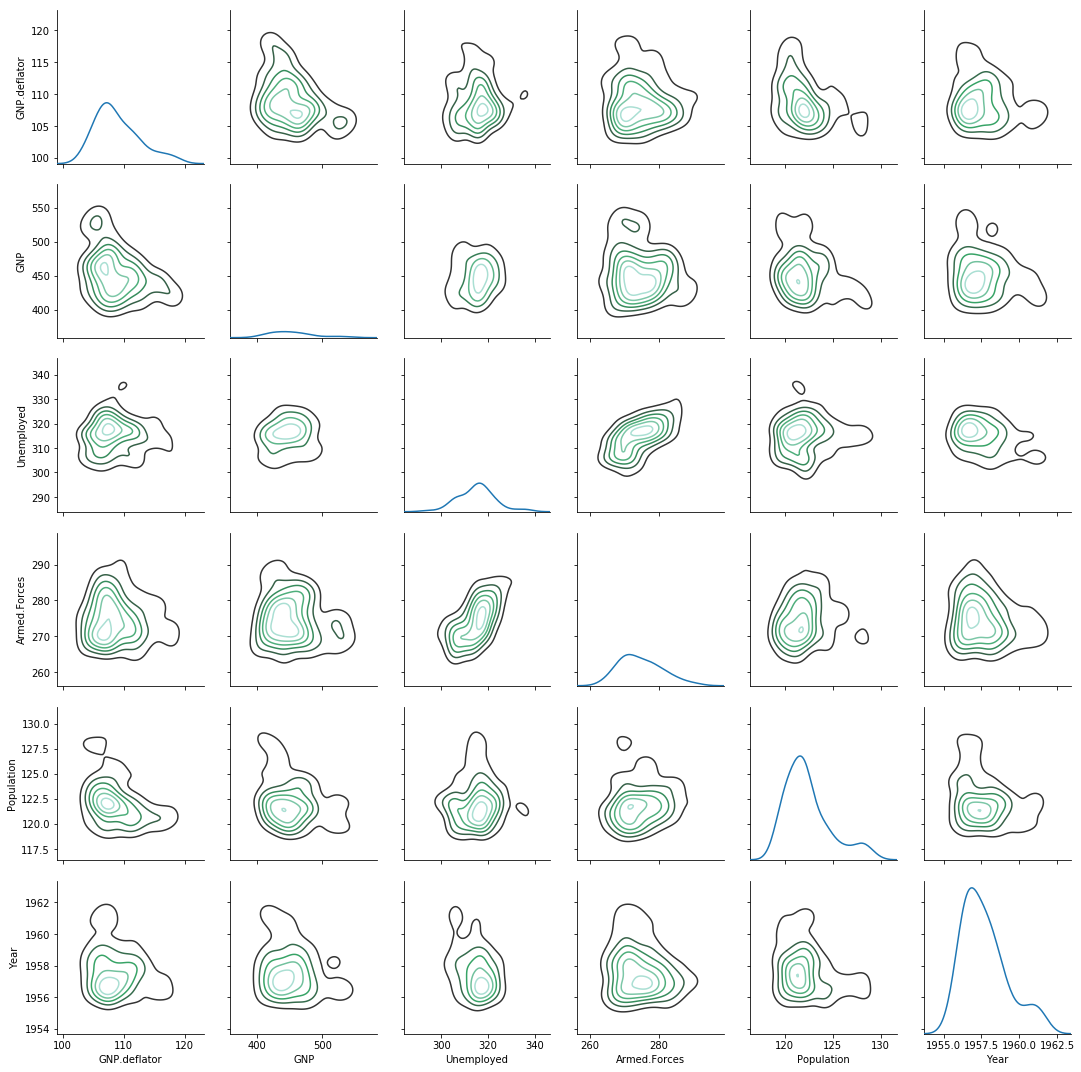

In [37]:
g = sns.PairGrid(pd.DataFrame(X_scaler.inverse_transform(samples)[10:], columns=D.columns[:6]))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

In [38]:
X

array([[-1.788, -1.594, -0.925, -1.509, -1.457, -1.627],
       [-1.261, -1.333, -0.96 , -1.708, -1.305, -1.41 ],
       [-1.29 , -1.347,  0.54 , -1.47 , -1.136, -1.193],
       [-1.166, -1.071,  0.174, -1.42 , -0.964, -0.976],
       [-0.525, -0.61 , -1.209,  0.731, -0.794, -0.759],
       [-0.343, -0.423, -1.394,  1.465, -0.617, -0.542],
       [-0.257, -0.232, -1.463,  1.395, -0.346, -0.325],
       [-0.161, -0.255,  0.425,  1.103, -0.179, -0.108],
       [-0.046,  0.102, -0.32 ,  0.655, -0.005,  0.108],
       [ 0.279,  0.327, -0.41 ,  0.371,  0.195,  0.325],
       [ 0.643,  0.572, -0.284,  0.284,  0.449,  0.542],
       [ 0.873,  0.591,  1.644,  0.045,  0.672,  0.759],
       [ 1.045,  0.987,  0.685, -0.081,  0.882,  0.976],
       [ 1.198,  1.194,  0.815, -0.138,  1.179,  1.193],
       [ 1.342,  1.356,  1.782, -0.051,  1.548,  1.41 ],
       [ 1.456,  1.737,  0.899,  0.327,  1.879,  1.627]])

In [42]:
print(samples)

[[ 7.417e-01  1.146e+00 -7.541e-01 -2.625e-01  1.124e+00  1.028e+00]
 [ 2.745e-01  4.497e-01 -3.411e-01  1.938e-01  2.042e+00  3.437e-01]
 [ 2.733e-01  1.357e+00 -5.355e-02  1.498e-01  7.878e-01  4.935e-01]
 [ 6.861e-01  8.841e-01  2.086e-02  1.647e-01  3.150e-01  7.368e-01]
 [ 3.960e-01  1.278e+00 -1.170e-01  1.713e-01  1.984e-01  1.164e+00]
 [ 1.111e+00  5.164e-01 -2.091e-02  2.142e-01  4.866e-01  5.627e-01]
 [ 1.766e-01  1.081e+00 -6.319e-02  2.112e-01  1.175e+00  5.439e-01]
 [ 4.720e-01  8.864e-01  3.308e-02  4.182e-01  1.029e+00  3.730e-01]
 [ 8.996e-01  6.640e-01  4.916e-02  2.315e-01  9.214e-01  2.923e-01]
 [ 2.637e-01  1.256e+00 -1.405e-01  1.716e-01  8.443e-01  8.067e-01]
 [ 1.733e-01  1.406e+00 -1.430e-01  7.753e-02  5.469e-01  9.057e-01]
 [ 4.697e-01  8.320e-01 -7.717e-02  1.314e-01  6.486e-01  1.042e+00]
 [ 7.697e-01  3.078e-01 -5.040e-02  2.334e-01  7.400e-01  9.232e-01]
 [ 1.604e+00  2.723e-01 -4.334e-02  1.781e-01  7.112e-01  2.840e-01]
 [ 7.064e-01  4.833e-01  1.106e-01